In [1]:
import pandas as pd

In [2]:
cars_df = pd.read_csv("car_price_prediction.csv")

In [3]:
cars_df.head() 

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
cars_df.drop(["ID"], axis=1, inplace=True) 

In [5]:
cars_df.groupby("Manufacturer")["Price"].mean().nlargest(3)

Manufacturer
LAMBORGHINI    872946.000000
BENTLEY        197574.500000
OPEL            73305.617128
Name: Price, dtype: float64

In [6]:
def clean_miles(mileage):
    return float(mileage.split(" ")[0])

In [7]:
cars_df["Mileage"] = cars_df["Mileage"].apply(clean_miles)
cars_df["Mileage"]

0        186005.0
1        192000.0
2        200000.0
3        168966.0
4         91901.0
           ...   
19231    300000.0
19232    161600.0
19233    116365.0
19234     51258.0
19235    186923.0
Name: Mileage, Length: 19236, dtype: float64

In [8]:
#cars_df["Mileage"] = cars_df["Mileage"].apply(lambda x: float(x.split(" ")[0])) 

In [9]:
def clean_levy(value):
    return int(value.replace("-","0"))

In [10]:
cars_df["Levy"] = cars_df['Levy'].apply(clean_levy)

In [11]:
cars_df["Levy"]

0        1399
1        1018
2           0
3         862
4         446
         ... 
19231       0
19232     831
19233     836
19234    1288
19235     753
Name: Levy, Length: 19236, dtype: int64

In [12]:
#cars_df["Levy"] = cars_df["Levy"].apply(lambda x: int(x.replace("-", "0"))) 

In [13]:
import matplotlib.pyplot as plt

In [14]:
top_ten_manufacturers = cars_df["Manufacturer"].value_counts().nlargest(10)

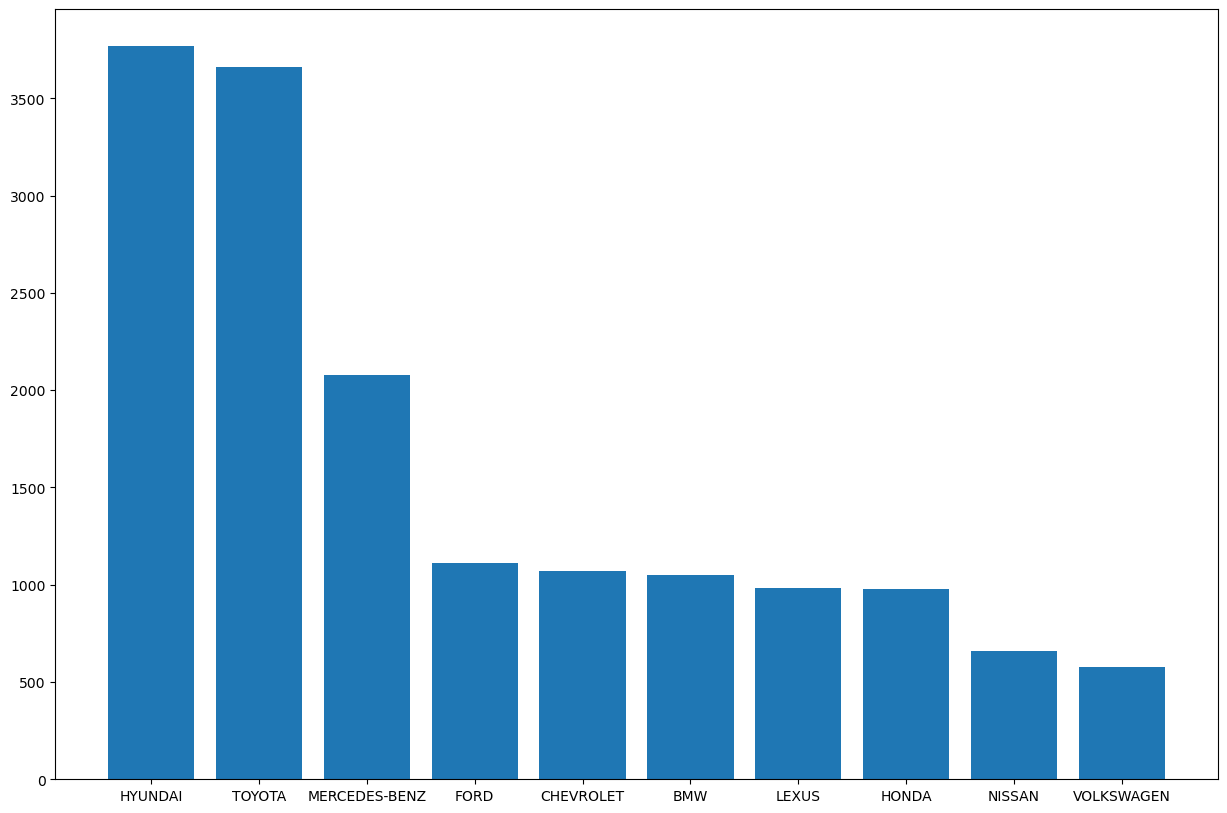

In [15]:
plt.figure(figsize=(15, 10))
plt.bar(x=top_ten_manufacturers.keys(), height=top_ten_manufacturers.values, );

In [16]:
cars_df["Mileage"] = cars_df["Mileage"].clip(lower=0, upper=750000)

Text(0, 0.5, 'Frequency')

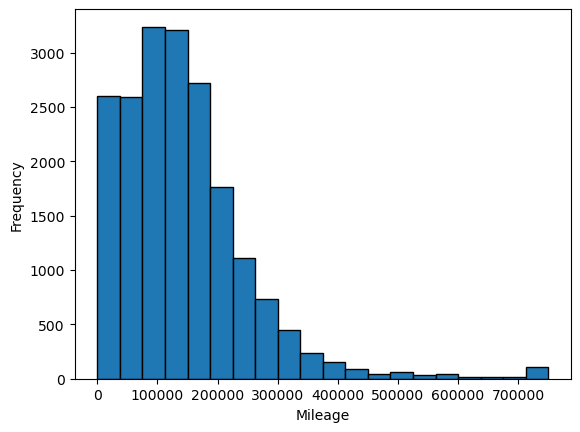

In [17]:
plt.figure()
plt.hist(cars_df["Mileage"], edgecolor="black", bins=20)
plt.xlabel("Mileage")
plt.ylabel("Frequency")

In [18]:
categorical_features = cars_df.select_dtypes(include=['object']).columns

In [19]:
one_hot_df = pd.get_dummies(cars_df, columns=categorical_features, ) 

In [20]:
one_hot_df 

,Price,Levy,Prod. year,Mileage,Cylinders,Airbags,Manufacturer_ACURA,Manufacturer_ALFA ROMEO,Manufacturer_ASTON MARTIN,Manufacturer_AUDI,...,Color_Green,Color_Grey,Color_Orange,Color_Pink,Color_Purple,Color_Red,Color_Silver,Color_Sky blue,Color_White,Color_Yellow
0,13328,1399,2010,186005.0,6.0,12,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
1,16621,1018,2011,192000.0,6.0,8,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,8467,0,2006,200000.0,4.0,2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,3607,862,2011,168966.0,4.0,0,False,False,False,False,...,False,False,False,False,False,False,False,False,True,False
4,11726,446,2014,91901.0,4.0,4,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19231,8467,0,1999,300000.0,4.0,5,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
19232,15681,831,2011,161600.0,4.0,8,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
19233,26108,836,2010,116365.0,4.0,4,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
19234,5331,1288,2007,51258.0,4.0,4,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [21]:
#conda install -c conda-forge py-xgboost 
import xgboost
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [23]:
data, labels = one_hot_df.drop("Price", axis=1), one_hot_df["Price"] 

In [24]:
X_train, X_test, y_train, y_test = train_test_split(data,labels, test_size = 0.2, random_state = 42)

In [25]:
regressor = xgboost.XGBRegressor()
regressor.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [26]:
preds = regressor.predict(X_test)

In [27]:
mean_absolute_error(preds, y_test) 

5818.894862613162

In [28]:
average_price = y_test.mean()
print(f"The average price in the y_test dataset is: {average_price}")

The average price in the y_test dataset is: 17006.20608108108
